<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [121]:
from IPython.display import display, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade seaborn
import seaborn as sns

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=500)

display(example)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

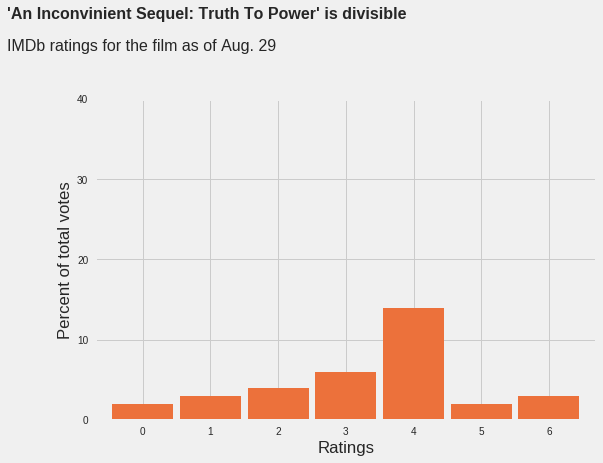

In [122]:
fake = pd.Series([2,3,4,6,14,2,3])
plt.style.use('fivethirtyeight')
ax = fake.plot.bar(color='#EC713B', width=0.9)
ax.set(xlabel='Ratings', ylabel='Percent of total votes',yticks=range(0,50, 10))
ax.text(x=-2, y=50, s ="'An Inconvinient Sequel: Truth To Power' is divisible", fontsize=16, fontweight='bold')
ax.text(x=-2, y=46, s ='IMDb ratings for the film as of Aug. 29', fontsize=16)
ax.tick_params(labelrotation=0)


In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [124]:
df.sample(1).T

,8179
timestamp,2017-08-03 16:20:02.994857
respondents,8
category,Males under 18
link,http://www.imdb.com/title/tt6322922/ratings-ma...
average,3.4
mean,4.9
median,3
1_votes,4
2_votes,0
3_votes,0


In [125]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index(df.timestamp, inplace=True)

In [127]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df['2017-08-29']

In [0]:
df.category.value_counts()

In [0]:
df.link.value_counts()

In [0]:
df[df.category=='IMDb users']

In [0]:
lastday = df['2017-08-29']
lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
final = df.tail(1)
columns = ['1_pct', '2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
data = final[columns].T

In [134]:
data.T

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


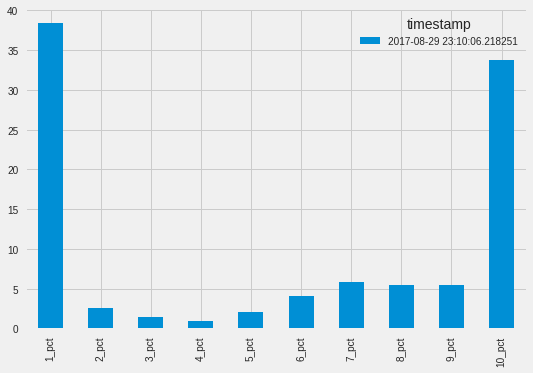

In [135]:
data.plot.bar()
#columns = ['{}_pct'.format(k) for k in range(1,11)]
#ax_real.get_legend().remove()


In [0]:
data.index = range(1,11)

In [137]:
data.head()

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1


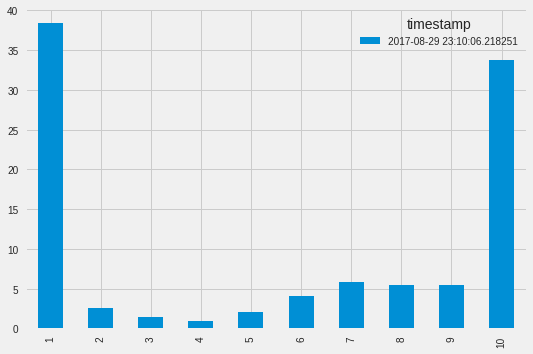

In [138]:
data.plot.bar()

In [0]:
colors = ['#333333'] *10
colors[0] = '#ec713b'

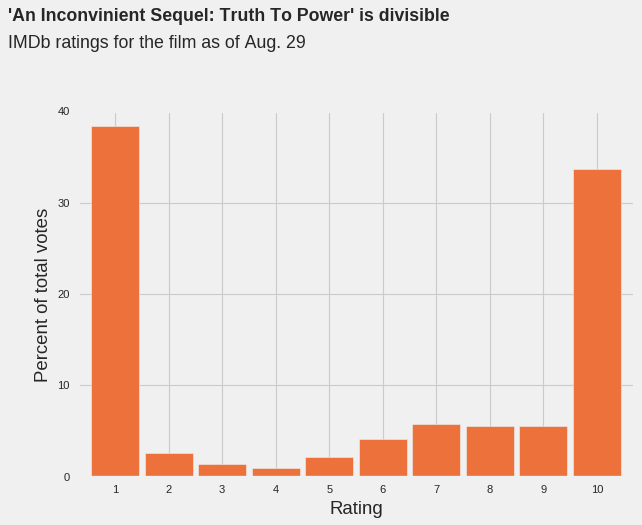

In [216]:
plt.style.use('fivethirtyeight')

ax_real = data.plot.bar(color=colors, width=0.9, legend=False);

ax_real.set(xlabel='Rating', 
            ylabel='Percent of total votes',
            yticks=range(0,50, 10))


ax_real.text(x=-2, y=50, s ="'An Inconvinient Sequel: Truth To Power' is divisible", 
             fontsize=16, fontweight='bold')

ax_real.text(x=-2, y=47, s ='IMDb ratings for the film as of Aug. 29', fontsize=16, fontweight='normal')


ax_real.tick_params(labelrotation=0)


In [141]:
display(example)

In [213]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index(df.timestamp, inplace=True)